In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections

### Simple EDA

In [22]:
df = pd.read_csv("usa-v2-preprocessed-overall.csv")

In [23]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404265 entries, 0 to 404264
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Text                               404265 non-null  object
 1   new_text                           404265 non-null  object
 2   languages                          404265 non-null  object
 3   new_text_after_translation         404264 non-null  object
 4   pos_tagged_words                   404265 non-null  object
 5   words_processed_all                404265 non-null  object
 6   words_processed_noun_adj_verb_adv  404265 non-null  object
 7   words_processed_noun               404265 non-null  object
dtypes: object(8)
memory usage: 24.7+ MB


In [25]:
df[df.duplicated()==True]

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
30799,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]
35619,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]
40138,#NAME?,#NAME?,Unknown,#NAME?,"[('name', 'NN')]",['name'],[],[]
78804,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]
144596,#NAME?,#NAME?,Unknown,#NAME?,"[('name', 'NN')]",['name'],['name'],['name']
160989,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],['name'],['name']
163860,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]
164687,#NAME?,#NAME?,Unknown,#NAME?,"[('name', 'NN')]",['name'],[],[]
166597,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]
166882,#NAME?,#NAME?,ENGLISH,#NAME?,"[('name', 'NN')]",['name'],[],[]


In [26]:
df.describe()

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
count,404265,404265,404265,404264,404265,404265,404265,404265
unique,404230,404219,404,404163,400537,394656,379004,320359
top,#NAME?,#NAME?,ENGLISH,#NAME?,[],[],[],[]
freq,36,44,348550,44,516,1025,6756,26419


In [27]:
df.dtypes

Text                                 object
new_text                             object
languages                            object
new_text_after_translation           object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [28]:
df.head()

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos..."
2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,FRENCH,just remember mr. leblanc the pressure that th...,"[('just', 'RB'), ('remember', 'VB'), ('my', 'P...","['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '..."
3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space..."
4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con..."


In [29]:
df["languages"].value_counts()

ENGLISH                                                            348550
Unknown                                                             34524
SPANISH                                                             11658
FRENCH                                                               2937
ENGLISH, Unknown                                                     1837
                                                                    ...  
WELSH, Unknown                                                          1
Chinese, Unknown, ChineseT, Unknown, Chinese, CROATIAN, Unknown         1
Japanese, ENGLISH, Unknown, ENGLISH                                     1
INUKTITUT, ENGLISH                                                      1
UZBEK, Unknown                                                          1
Name: languages, Length: 404, dtype: int64

### Sentence Length Distribution

In [13]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 301, Min length: 1, Average Length :  139.65566398278358


<AxesSubplot:>

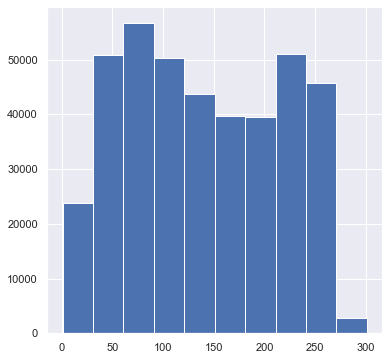

In [69]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [70]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["Text"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [71]:
df.head()

,Text,new_text,languages,new_text_after_translation,word_count
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,43
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...",21
2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,FRENCH,just remember mr. leblanc the pressure that th...,44
3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...",45
4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,38


In [72]:
df["word_count"].describe()

count    404265.000000
mean         22.656651
std          12.291731
min           1.000000
25%          12.000000
50%          22.000000
75%          33.000000
max          90.000000
Name: word_count, dtype: float64

<AxesSubplot:>

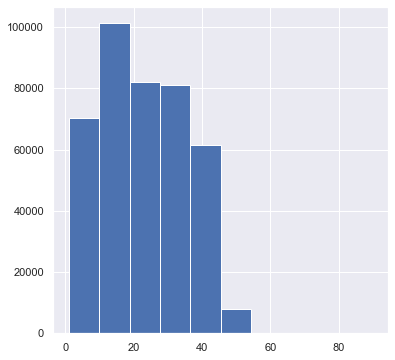

In [73]:
#word length distribution
df['word_count'].hist()

### Word Clouds

#### Text before preprocessing

In [74]:
stopwords = set(STOPWORDS)
stopwords.update(["covid", "nineteen", "vaccine", "vaccinated", "america", "usa", "country", "people", "today", "need", "vaccination", 
                  "covidvaccine", "vaccinate", "dose", "go", "want", "fully", "thank", "getting", "first", "second", "take", "american", "already", "shot",
                 "available", "going", "person", "said", "even", "make", "give", "know", "time", "still", "unvaccinate", "pfizer", "covaxin", 
                 "unvaccinated", "moderna", "janssen", "anti-vaccination", "anti-vaccine", "antivaxxer", "effective-vaccine", "immunocompromised", 
                  "mandated-vaccine", "never-vaccine", "trust-vaccine", "vaccinesaveslives", "covid vaccine", "covid vaccination", "astrazeneca", "covaxin", 
                  "covishield", "covovax", "sputnik", "gamaleya", "vaxx", "though", "three", "really", "year", "thing", "come", "anti", "think", "india", "indian"])

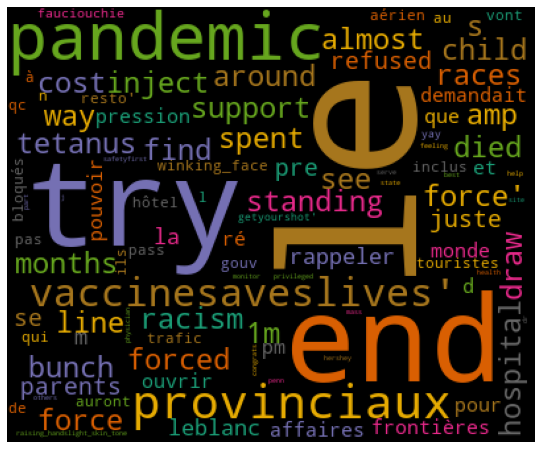

In [75]:
#overall wordcloud of text without preprocessing 

text = df['new_text'].values 
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### All processed words

In [76]:
def convert(a_series):
    consolidated_list = []
    str1 = " "
    for each in a_series:
        words_list = ast.literal_eval(each)
        for word in words_list:
            consolidated_list.append(word)
    return (str1.join(consolidated_list))

In [77]:
tweets_string = convert(df["words_processed_all"])


KeyError: 'words_processed_all'

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### NOUN, ADJ, VERB, ADVERB

In [ ]:
tweets_string_nounadj = convert(df["words_processed_noun_adj_verb_adv"])


In [ ]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_nounadj)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**NOUN**

In [ ]:
tweets_string_noun = convert(df["words_processed_noun"])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, width=400, height=330, max_words=300,colormap="Dark2").generate(tweets_string_noun)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Count

#### words_processed_all

In [ ]:
words_list_all = [ast.literal_eval(each) for each in df["words_processed_all"]]

In [ ]:
# List of all words across tweets
all_words = list(itertools.chain(*words_list_all))
all_words_count = collections.Counter(all_words)

In [ ]:
all_words_count.most_common(15)

#### words_processed_noun_adj_verb_adv

In [ ]:
words_list_noun_adj_verb_adv = [ast.literal_eval(each) for each in df["words_processed_noun_adj_verb_adv"]]

In [ ]:
# List of all words across tweets
noun_adj_verb_adv_words = list(itertools.chain(*words_list_noun_adj_verb_adv))
noun_adj_verb_adv_words_count = collections.Counter(noun_adj_verb_adv_words)

In [ ]:
noun_adj_verb_adv_words_count.most_common(15)

#### words_processed_noun

In [ ]:
words_list_noun = [ast.literal_eval(each) for each in df["words_processed_noun"]]

In [ ]:
# List of all words across tweets
noun_words = list(itertools.chain(*words_list_noun))
noun_words_count = collections.Counter(noun_words)


In [ ]:
noun_words_count.most_common(15)

# Sentiment Analysis 

## TextBlob

### Polarity

In [30]:
from textblob import TextBlob

In [ ]:
df['polarity']=df['words_processed_all'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Tweets with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Text']):
    print('Tweets {}:\n'.format(index+1),review)

In [ ]:
print("3 Random Tweets with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:10].index]['Text']):
    print('Tweet {}:\n'.format(index+1),review)

In [ ]:
sentiment_polarity = []
for each in df["polarity"]:
    if each == 0:
        sentiment_polarity.append("neutral")
    elif each > 0:
        sentiment_polarity.append("positive")
    else:
        sentiment_polarity.append("negative")

In [ ]:
df["sentiment_polarity"] = sentiment_polarity

In [ ]:
sns.countplot(x="sentiment_polarity", data=df)
normalise_count = df['sentiment_polarity'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

### Subjectivity

In [31]:
newlist = []

for row in df['new_text_after_translation']:
    row = str(row)
    newlist.append(row)

In [32]:
newlist

['want find way end racism try force people inject themselves. that’s what i see bunch people all races standing up against forced vaccination. not against vaxx.some people need these vaxx &amp; i support those people getting their shot. i draw line at force',
 'this child almost died tetanus, spent months hospital at cost around $1m, his parents still refused vaccination after. this was pre-pandemic.',
 'just remember mr. leblanc the pressure that the provincial pm and the business world asked for it to be able to re-open the borders winking_face air traffic. + will the provincial govt, qc included, block tourists who will not have a pass-vaccination at the hotel at the restaurant',
 'you would expect cases rise significantly, course, vaccination rates come into play as does space. we as adults are not usually confined single space with as many people as school age students. data states that have lifted vs those that have not bears this out.',
 "depends whether vaccination status is e

In [33]:
df['new_text_after_translation'] = newlist

In [34]:
df['subjectivity']=df['new_text_after_translation'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [35]:
text_type = []
for each in df["subjectivity"]:
    if each >= 0.5:
        text_type.append("opinion-based")
    else:
        text_type.append("fact-based")
df["text_type"] = text_type

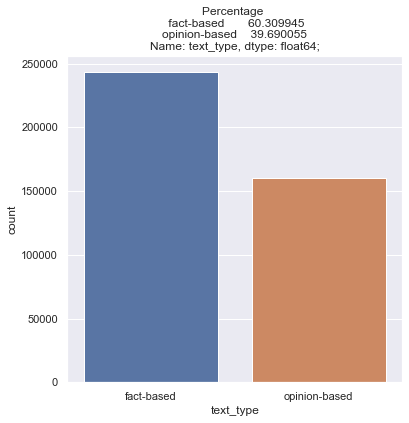

In [36]:
sns.countplot(x="text_type", data=df)
normalise_count = df['text_type'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [37]:
df.to_csv("USA-subjectivity.csv")

### VADER Sentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

In [ ]:
df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
df

In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df

In [ ]:
df["compound"].value_counts()

In [ ]:
sentiment_vader = []
for each in df["compound"]:
    if each == 0:
        sentiment_vader.append("neutral")
    elif each > 0:
        sentiment_vader.append("positive")
    else:
        sentiment_vader.append("negative")

In [ ]:
df["sentiment_vader"] = sentiment_vader

In [ ]:
sns.countplot(x="sentiment_vader", data=df)
normalise_count = df['sentiment_vader'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [ ]:
pos = df[df["sentiment_vader"] == "positive"]
neg = df[df["sentiment_vader"] == "negative"]
neu = df[df["sentiment_vader"] == "neutral"]

In [ ]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

In [ ]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

In [ ]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")